In [10]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from imblearn.under_sampling import ClusterCentroids

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn import svm
import scikitplot as skplt

In [2]:
df = pd.read_csv("data/creditcard.csv")
y = df["Class"]
X = df.drop("Class", 1).drop("Time", 1)
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

In [12]:
X_train = np.load("scores/under/centroids/k-1-X_train.npy")
y_train = np.load("scores/under/centroids/k-1-y_train.npy")
        
X_test = np.load("scores/under/centroids/k-1-X_test.npy")
y_test = np.load("scores/under/centroids/k-1-y_test.npy")

In [24]:
cl = svm.SVC()
cl.fit(X_train, y_train)

C:\Users\tanni\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
pred = cl.predict(X_test)

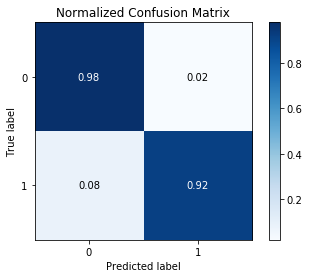

In [26]:
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)